**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: Armando Cerda
*   MATRÍCULA: A01570376

*   NOMBRE: Christopher Parga
*   MATRÍCULA: A00818942

*   NOMBRE: Julio Ruiz
*   MATRÍCULA: A01794742

*   NOMBRE: Mayra Cabrera
*   MATRÍCULA: A01795439

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [19]:
insurance_df.describe(include='all') # Tanto para numéricas como para no númericas.

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


1b) Búsqueda de valores faltantes.

In [20]:
import random
ex1, ex2, ex3 = random.sample(range(len(insurance_df)), 3)

print("Dataframe total rows: ", len(insurance_df))
df_info = pd.DataFrame(data=insurance_df.dtypes)
missing_values_total = insurance_df.notnull().sum() 
missing_values_percent = round((1 - missing_values_total / len(insurance_df)) * 100, 2).astype(str) + " %"

column_length = insurance_df.apply(len)  
unique_values_count = insurance_df.nunique() 

final_df = pd.concat([df_info[0].rename("Data Type"),
                      insurance_df.T[ex1].rename("Example 1"),
                      insurance_df.T[ex2].rename("Example 2"),
                      insurance_df.T[ex3].rename("Example 3"),
                      column_length.rename("Column Length"),                      
                      missing_values_total.rename("Total Not Missing"),
                      missing_values_percent.rename("% of missing values"),
                      unique_values_count.rename("Unique Values Count")], axis=1)
final_df

Dataframe total rows:  1338


,Data Type,Example 1,Example 2,Example 3,Column Length,Total Not Missing,% of missing values,Unique Values Count
age,int64,19,27,47,1338,1338,0.0 %,47
sex,object,male,female,male,1338,1338,0.0 %,2
bmi,float64,30.4,24.1,29.83,1338,1338,0.0 %,548
children,int64,0,0,3,1338,1338,0.0 %,6
smoker,object,no,no,no,1338,1338,0.0 %,2
region,object,southwest,southwest,northwest,1338,1338,0.0 %,4
charges,float64,1256.299,2974.126,9620.3307,1338,1338,0.0 %,1337


In [21]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
numeric_columns = insurance_df.select_dtypes(include=['int64', 'float64'])
print("Número de columnas numéricas:", numeric_columns.shape[1])
# ¿Cuántas columnas cualitativas hay?
qualitative_columns = insurance_df.select_dtypes(include=['object', 'category'])
print("Número de columnas cualitativas:", qualitative_columns.shape[1])


Número de columnas numéricas: 4
Número de columnas cualitativas: 3


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas. 

Variable: age


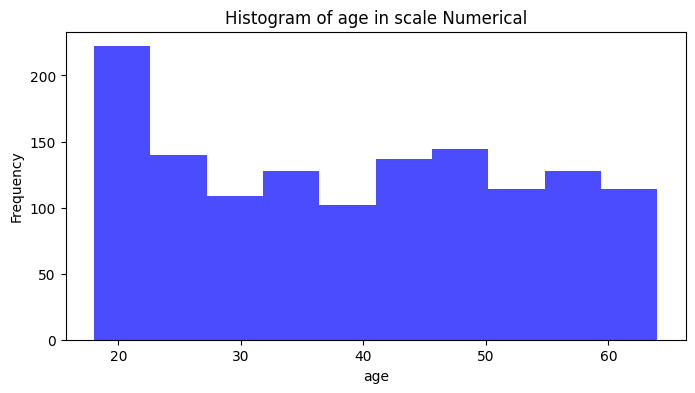

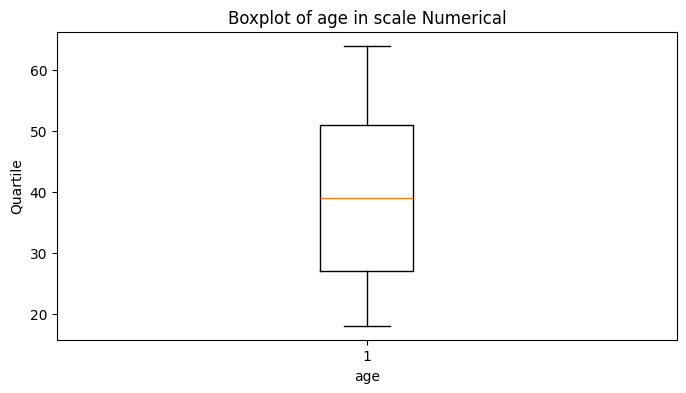

Variable: sex


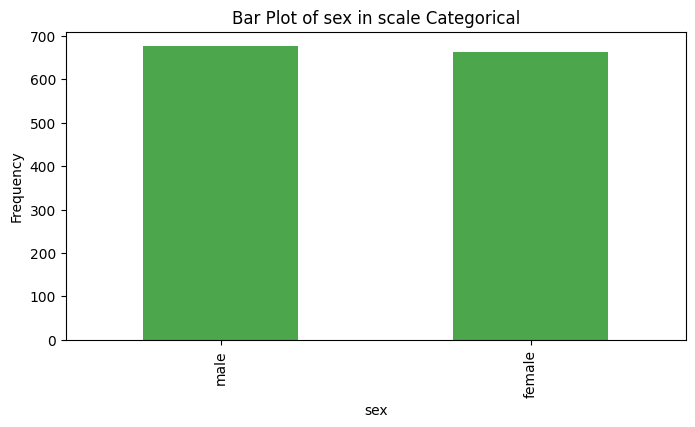

Variable: bmi


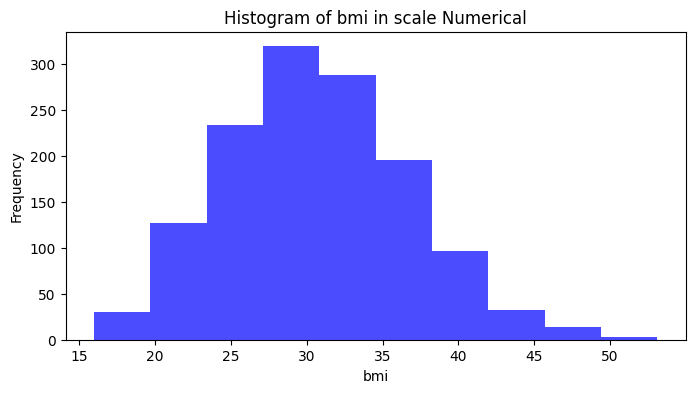

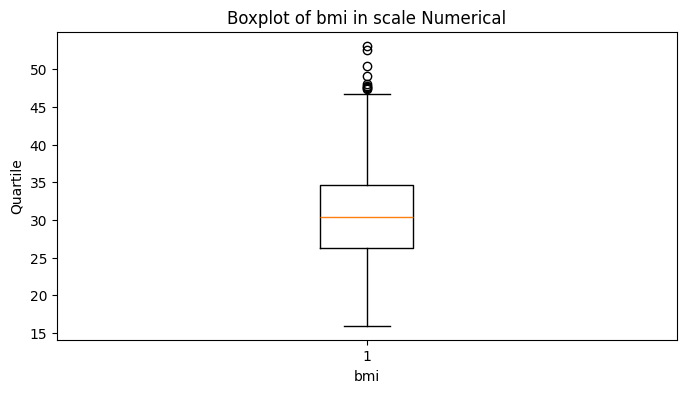

Variable: children


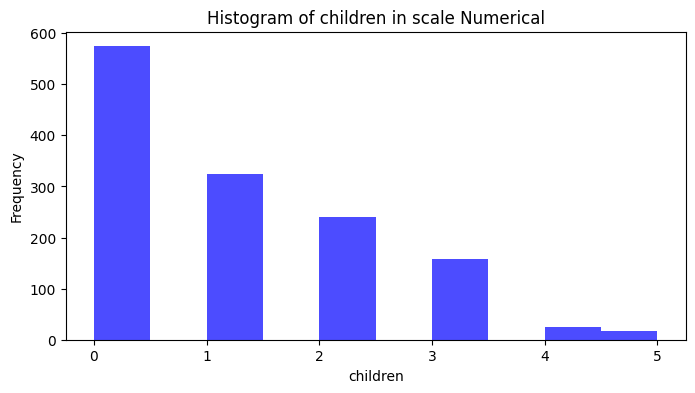

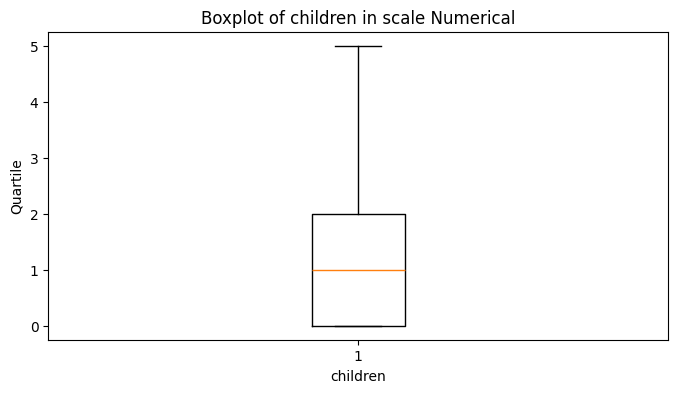

Variable: smoker


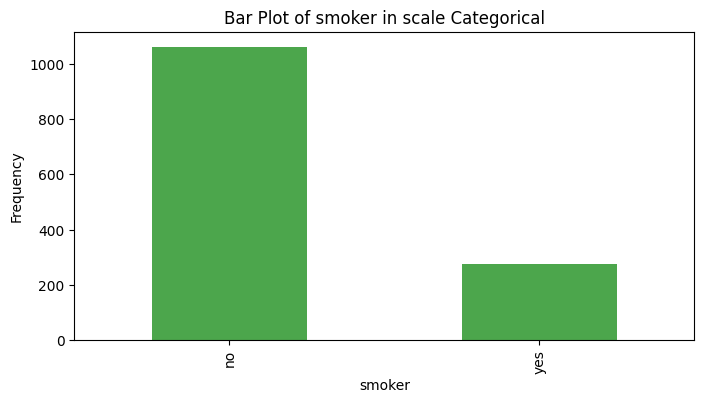

Variable: region


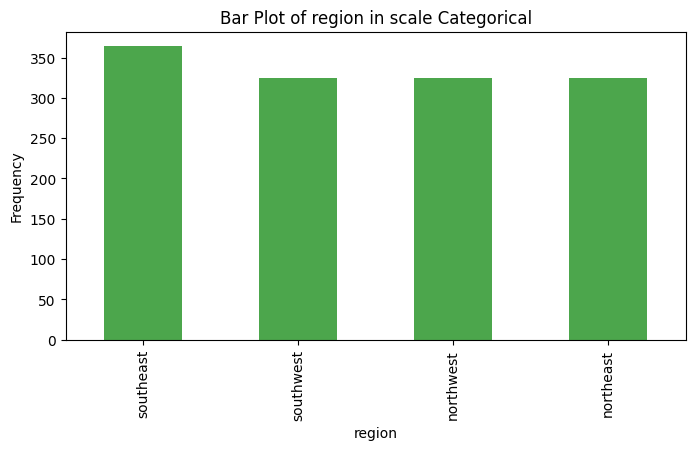

Variable: charges


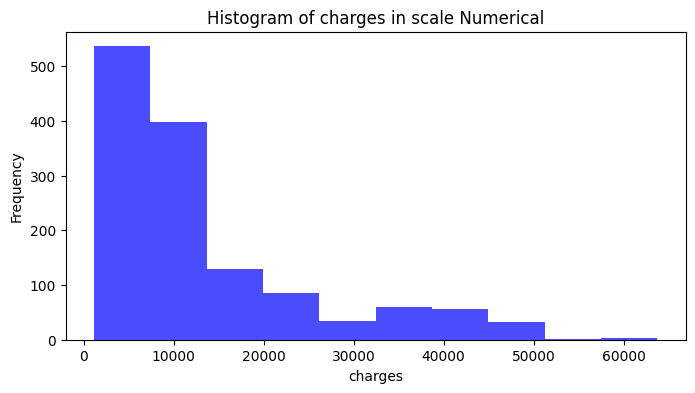

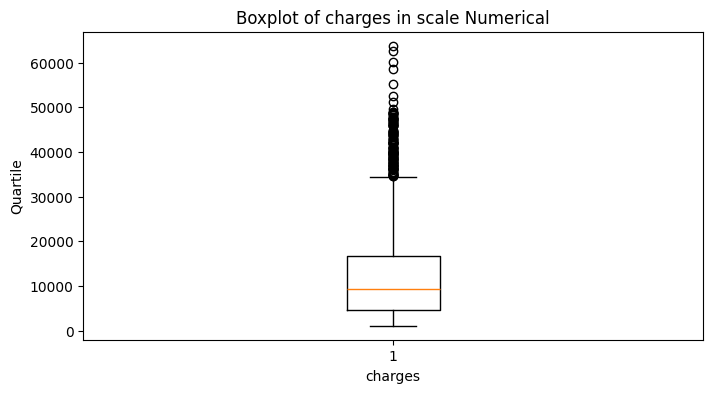

In [23]:
def classify_and_visualize_variable(df, var_name):
    print(f"Variable: {var_name}")
    
    if df[var_name].dtype in ['int64', 'float64']:
        scale = 'Numerical'
        plt.figure(figsize=(8, 4))
        plt.hist(df[var_name].dropna(), bins=10, color='blue', alpha=0.7)
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {var_name} in scale {scale}')
        plt.show()
        
        plt.figure(figsize=(8, 4))
        plt.boxplot(df[var_name].dropna())
        plt.xlabel(var_name)
        plt.ylabel('Quartile')
        plt.title(f'Boxplot of {var_name} in scale {scale}')
        plt.show()
    else:
        scale = 'Categorical'
        plt.figure(figsize=(8, 4))
        df[var_name].value_counts().plot(kind='bar', color='green', alpha=0.7)
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot of {var_name} in scale {scale}')
        plt.show()
    
    return scale

for col in insurance_df.columns:
    classify_and_visualize_variable(insurance_df, col)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot. 

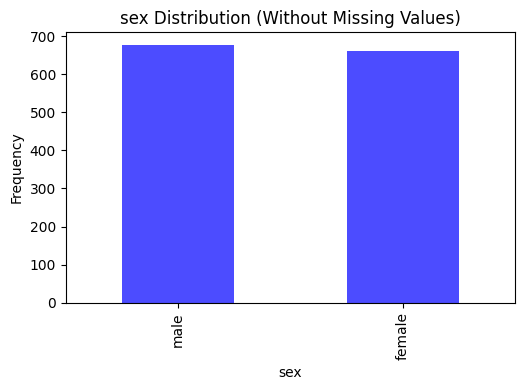

In [24]:
def visualize_data(df, var_name, target_var):
    BM_MV = df[target_var].isna()
    # For numerical variables
    if np.issubdtype(df[var_name].dtype, np.number):
        # Box plot
        labels = ['Without Missing Values', 'With Missing Values']
        plt.boxplot([df[~BM_MV][var_name].dropna(), df[BM_MV][var_name].dropna()], vert=False, labels=labels)
        plt.xlabel(var_name)
        plt.title(f'Boxplot of {var_name}')
        plt.show()

        # Histogram
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        df[~BM_MV][var_name].hist(color='blue', alpha=0.7)
        plt.xlabel(var_name)
        plt.title(f'{var_name} Distribution (Without Missing Values)')

        if BM_MV.sum() > 0:        
            plt.subplot(1, 2, 2)
            df[BM_MV][var_name].hist(color='red', alpha=0.7)
            plt.xlabel(var_name)
            plt.title(f'{var_name} Distribution (With Missing Values)')
        
        plt.tight_layout()
        plt.show()

    # For categorical variables
    else:
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        df[~BM_MV][var_name].value_counts().plot(kind='bar', color='blue', alpha=0.7)
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
        plt.title(f'{var_name} Distribution (Without Missing Values)')
       
        if BM_MV.sum() > 0:                
            plt.subplot(1, 2, 2)
            df[BM_MV][var_name].value_counts().plot(kind='bar', color='red', alpha=0.7)
            plt.xlabel(var_name)
            plt.ylabel('Frequency')
            plt.title(f'{var_name} Distribution (With Missing Values)')
            
        plt.tight_layout()
        plt.show()


visualize_data(insurance_df, 'sex', 'charges')

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico? 

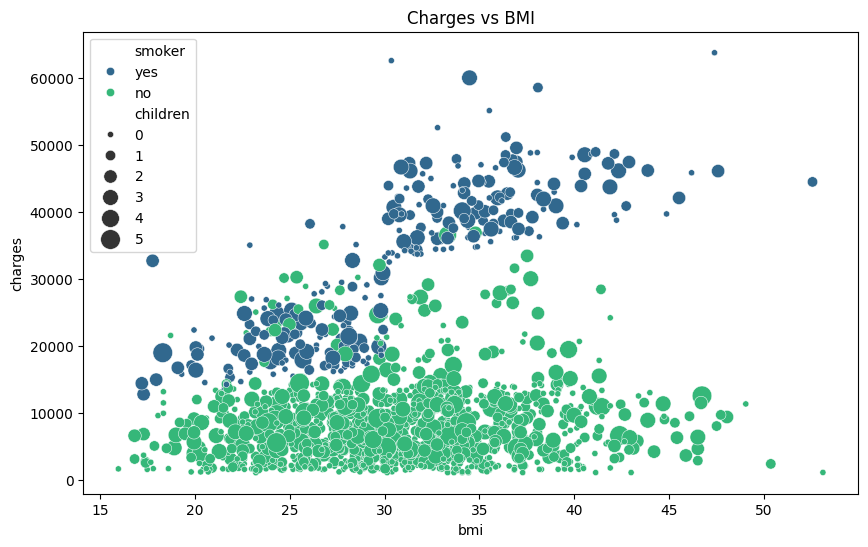

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', sizes=(20, 200), palette='viridis')
plt.title('Charges vs BMI')
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas. 

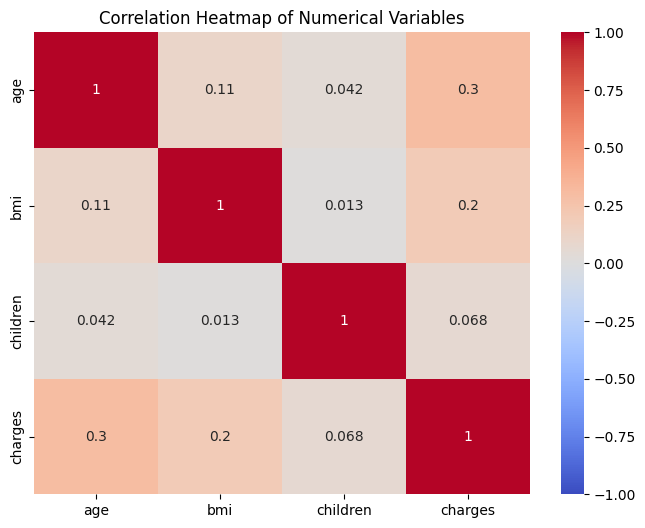

In [26]:
corr = numeric_columns.corr()

# Set up a matplotlib figure
plt.figure(figsize=(8, 6))

# Generate heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show plot
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`. 

3a) ¿Cuál es el promedio de `age` y de `bmi`? 

In [27]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter DataFrame to keep only outlier rows
outliers_df = insurance_df[(insurance_df['charges'] < lower_bound) | (insurance_df['charges'] > upper_bound)]

In [28]:
print("Average age:", outliers_df['age'].mean())
print("Average bmi:", outliers_df['bmi'].mean())


Average age: 41.07913669064748
Average bmi: 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores? 

In [29]:
male_percentage = (outliers_df[outliers_df['sex'] == 'male'].shape[0] / outliers_df.shape[0]) * 100
female_percentage = 100 - male_percentage

print(f"Males: {male_percentage:.2f}%")
print(f"Females: {female_percentage:.2f}%")

Males: 64.03%
Females: 35.97%


In [30]:
smoker_percentage = (outliers_df[outliers_df['smoker'] == 'yes'].shape[0] / outliers_df.shape[0]) * 100
non_smoker_percentage = 100 - smoker_percentage

print(f"Smokers: {smoker_percentage:.2f}%")
print(f"Non-smokers: {non_smoker_percentage:.2f}%")

Smokers: 97.84%
Non-smokers: 2.16%


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`). 

In [31]:
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción. 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=X['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(),  ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(),  ['sex', 'smoker', 'region'])
    ])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`. 

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_pipeline = Pipeline([('preprocessing', preprocessing), ('lr', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
lr_model = lr_pipeline

print(f"RMSE: {rmse}, R2: {r2}")

RMSE: 5701.985571239995, R2: 0.7535759812640819


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`. 


In [35]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

y_train[y_train > upper_limit] = upper_limit
y_test[y_test > upper_limit] = upper_limit

lr_pipeline.fit(X_train, y_train)
y_pred2 = lr_pipeline.predict(X_test)

rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)
lr_model2 = lr_pipeline

print(f"RMSE after outlier replacement: {rmse2}, R2: {r2_2}")

RMSE after outlier replacement: 4995.006848214861, R2: 0.7605694820306439


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`. 

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [36]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OrdinalEncoder(),  ['sex', 'smoker', 'region'])
    ])

lr_pipeline2 = Pipeline([
    ('preprocessing2', preprocessing2),
    ('lr', LinearRegression())
])

lr_pipeline2.fit(X_train, y_train)
y_pred3 = lr_pipeline2.predict(X_test)

rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
r2_3 = r2_score(y_test, y_pred3)
lr_model3 = lr_pipeline2


print(f"RMSE with new preprocessing: {rmse3}, R2: {r2_3}")

RMSE with new preprocessing: 4994.25886338128, R2: 0.760641184429659


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [37]:
from sklearn.preprocessing import PolynomialFeatures

best_rmse = float('inf')
best_degree = 0

for degree in range(2, 6): 
    poly_pipeline = Pipeline([
        ('preprocessing', preprocessing2),
        ('polynomial', PolynomialFeatures(degree=degree)),
        ('lr', LinearRegression())
    ])

    poly_pipeline.fit(X_train, y_train)
    y_pred_poly = poly_pipeline.predict(X_test)

    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

    if rmse_poly < best_rmse:
        best_rmse = rmse_poly
        best_degree = degree

lr_model4 = Pipeline([
    ('preprocessing', preprocessing2),
    ('polynomial', PolynomialFeatures(degree=best_degree)),
    ('lr', LinearRegression())
])
lr_model4.fit(X_train, y_train)

print(f"Best degree: {best_degree}, RMSE: {best_rmse}")


Best degree: 2, RMSE: 4384.469172579081


In [38]:
from joblib import dump, load

dump(lr_model, 'lr_model.joblib')
dump(lr_model2, 'lr_model2.joblib')
dump(lr_model3, 'lr_model3.joblib')
dump(lr_model4, 'lr_model4.joblib')

['lr_model4.joblib']